In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl

!matplotlib inline
plt.rcParams['figure.figsize'] = [10*2/2.54, 8*2/2.54]
mpl.rcParams['figure.dpi'] = 160

/bin/bash: matplotlib: command not found


In [2]:
def ref_trajectory_generation(t):
    x_c = 0
    y_c = 0
    R = 3
    w_d = 1/15 # desired angular speed
    x = x_c + R*np.sin(2*w_d*t)
    y = y_c + R*np.sin(w_d*t)

    dotx = 2*R*w_d*np.cos(2*w_d*t)
    doty = R*w_d*np.cos(w_d*t)
    return [x, y, dotx, doty]

t = np.linspace(0,100,1000)
(x_d, y_d,dotx_d, doty_d) = ref_trajectory_generation(t)


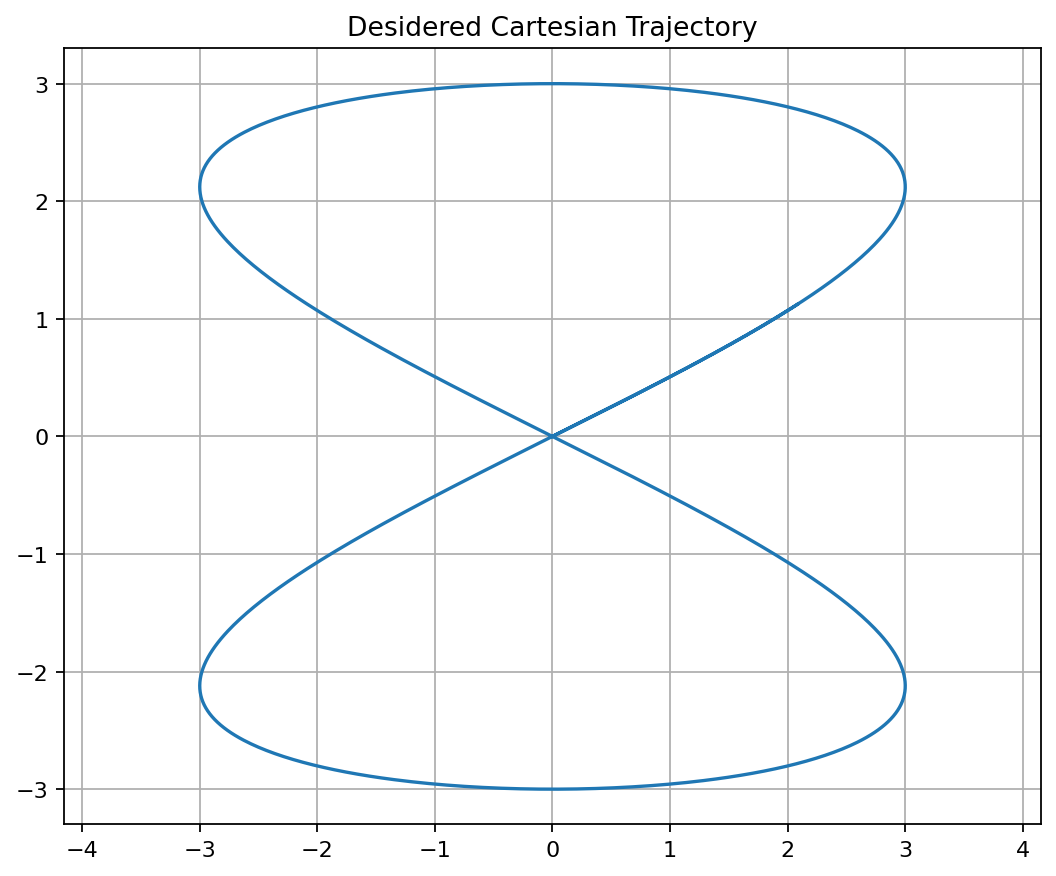

In [3]:
plt.plot(x_d,y_d)
plt.title('Desidered Cartesian Trajectory')
plt.axis('equal')
plt.grid()

In [4]:
# CONTROL LAW IMPLEMTATION
k_1 = 0.5
k_2 = 0.5
k_1f = 0 # turn off the ff component
k_2f = 0
def control(y1,y2,y1d,y2d,doty1d,doty2d):
    global k_1, k_2, k_1f, k_2f
    u_1 = k_1f*doty1d + k_1*(y1d - y1)
    u_2 = k_2f*doty2d + k_2*(y2d - y2)
    return [u_1, u_2]

In [77]:
b = 0.2 # Distance from point B to the point of contact P
u1 = []
u2 = []
theta_t = []
sim_t = []

def unicycle_linearized_model(y,t,*args):
    global u1,u2,theta_t
    global b
    y1d, y2d, doty1d, doty2d,time  = args
    T = np.searchsorted(time,t)
    if (T>=len(time)):
        T = len(time)-1

    y1 = y[0]
    y2 = y[1]
    theta = y[2]
    (u_1,u_2) = control(y1,y2,y1d[T],y2d[T],doty1d[T],doty2d[T])

    doty_1 = u_1
    doty_2 = u_2
    dottheta = u_2/b * np.cos(theta)- u_1/b * np.sin(theta)
    theta_t.append(theta)
    u1.append(u_1)
    u2.append(u_2)
    sim_t.append(t)
    ret  = [doty_1,doty_2,dottheta]
    return ret

In [78]:
y_0 = [4,0,0]
args = (x_d,y_d,dotx_d,doty_d,t)
y = odeint(unicycle_linearized_model,np.array(y_0),t,args)


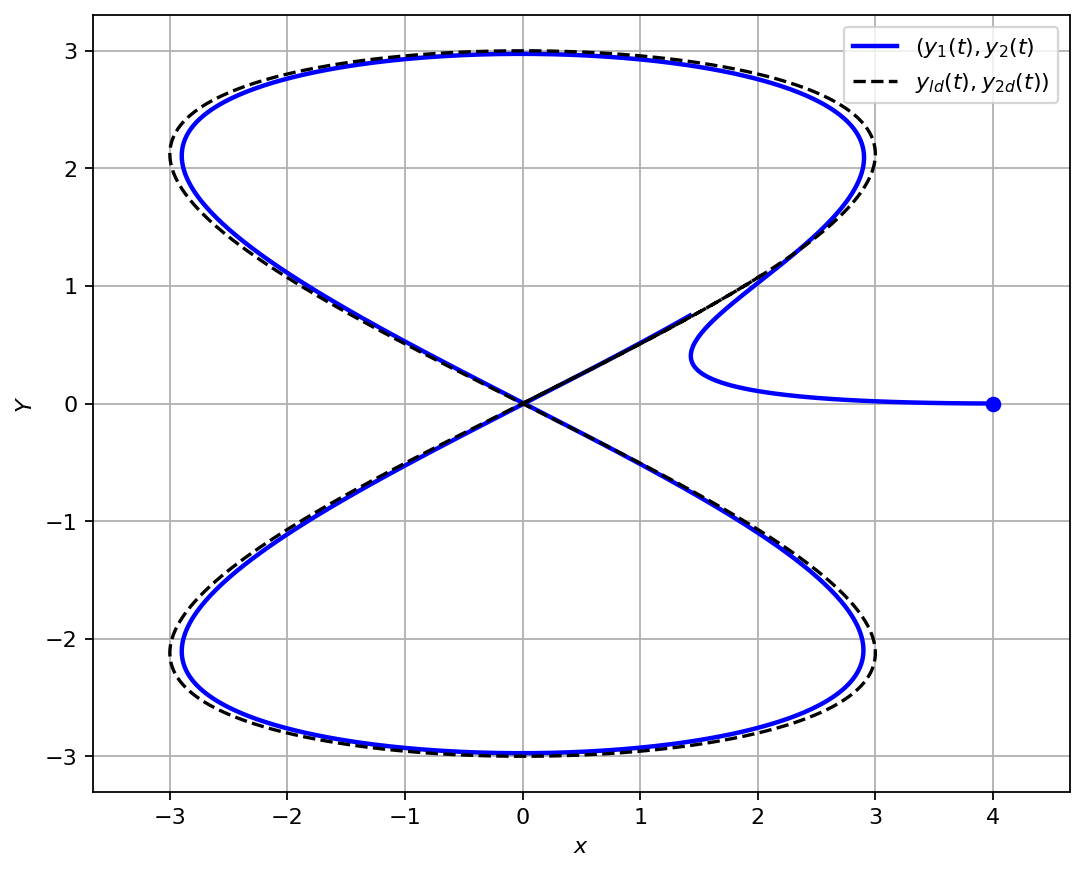

In [79]:
plt.plot(y[:,0],y[:,1],'b',lw = 2)
plt.plot(x_d,y_d,'k--')
plt.plot(y[0,0],y[0,1],'bo')
plt.grid()
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.legend([r'$(y_1(t),y_2(t)$',r'$y_{ld}(t),y_{2d}(t))$'])


In [ ]:
# Plotting the trajectory of the point of contact P
v = []
w = []
x_t = []
y_t = []
theta = y[:,2]

for i in np.arange(0,len(t)):
    T = np.searchsorted(sim_t,t[i])
    if (T>=len(sim_t)):
        T=len(sim_t)-1
    v.append(np.cos(theta_t[T])*u1[T] + np.sin(theta_t[T])*u2[T])
    w.append(-1./b*np.sin(theta_t[T])*u1[T]+1/b*np.cos(theta_t[T]*u2[T]))
    x_t.append(y[i,0] - b*np.cos(y[i,2]))
    y_t.append(y[i,1] - b*np.sin(y[i,2]))



In [ ]:
plt.plot(x_t,y_t,'b',lw = 1.5)
plt.plot(y[:,0],y[:,1],'orange',lw=1.5)
plt.plot(x_d,y_d,'k--',lw=1)
plt.grid()
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
